# **MNIST Handwritten Digits Dataset**

The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

Preprocessing programs made available by NIST were used to extract normalized bitmaps of handwritten digits from a preprinted form. 30 contributed to this training set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.

For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G. T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C. L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469, 1994.

## **Loading the Data**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('data/mnist.csv')

df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [14]:
df.index

RangeIndex(start=0, stop=1797, step=1)

In [36]:
from PIL import Image
import string
import random

In [37]:
def generate_random_string(length=10):
    # Define the characters to choose from: all uppercase and lowercase letters and digits
    characters = string.ascii_letters + string.digits
    # Generate a random string by choosing 'length' characters from the pool
    random_string = ''.join(random.choice(characters) for _ in range(length))
    return random_string

In [44]:
random_string = generate_random_string(20)

print("Random String:", random_string)

Random String: odPUlNw6cRHfJ6HK5BOH


In [46]:
import numpy as np

np.random.randint(0, 100)

55

In [117]:
from PIL import ImageOps

In [ ]:
# Add padding to the image
padded_img = ImageOps.expand(img_cropped, border=50, fill='red')

plt.imshow(padded_img)

In [128]:
for i in df.index:
    img_grid = np.reshape(df.iloc[0, 0:-1], (8,8))
    img_grid = (img_grid - img_grid.min()) * (255 / (img_grid.max() - img_grid.min()))
    label = df.iloc[i, -1]
    choice = np.random.randint(0, 100)
    image = Image.fromarray(img_grid.astype("uint8"), mode="L")
    if choice % 2 == 0:
        # Add padding to the image
        image = ImageOps.expand(image, border=5, fill='black')
    file_name = generate_random_string(20)
    image.save(f"data/images/{label}/{file_name}.png")
    break

In [54]:
img = Image.open("data/images/0/NuDdSRKAXVvjQP4oohgk.png")

print(img.size)
print(img.mode)
print(img.format)

(8, 8)
L
PNG


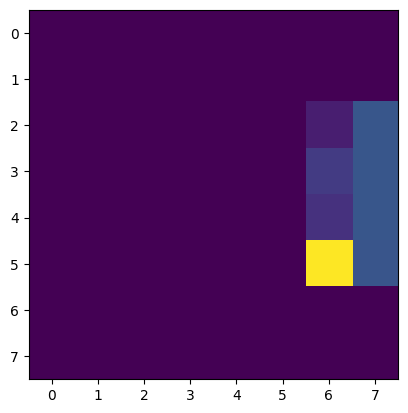

In [50]:
plt.imshow(img)

In [3]:
df.shape

(1797, 65)

In [4]:
df.label.value_counts()

label
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

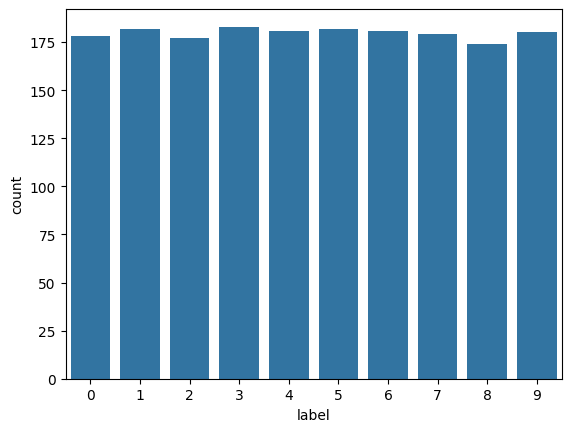

In [5]:
sns.countplot(data=df, x='label')

In [6]:
X = df.drop('label', axis=1)

y = df['label']

In [7]:
idx = np.random.randint(0, 1796, 9)

print(idx)

[ 231  383 1091 1494   37  448  891  228  273]


8
[[ 0.  0. 13. 16. 16. 15.  2.  0.]
 [ 0.  0. 14. 13. 11. 16.  2.  0.]
 [ 0.  0. 11. 13. 15.  6.  0.  0.]
 [ 0.  0.  5. 16. 10.  0.  0.  0.]
 [ 0.  0. 10. 14. 15.  0.  0.  0.]
 [ 0.  1. 14.  3. 15.  7.  0.  0.]
 [ 0.  6. 11.  0. 15.  6.  0.  0.]
 [ 0.  1. 13. 16. 15.  3.  0.  0.]]


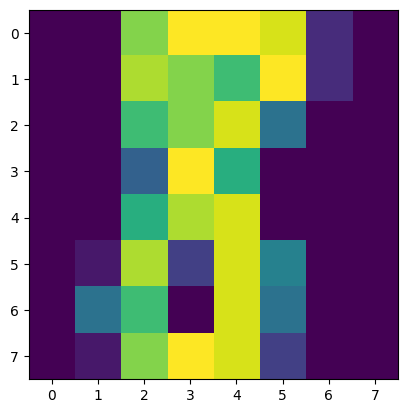

In [51]:
print(y[idx[0]])

print(np.reshape(X.values[idx[0]], (8,8)))

img = np.reshape(X.values[idx[0]], (8,8))

plt.imshow(img)

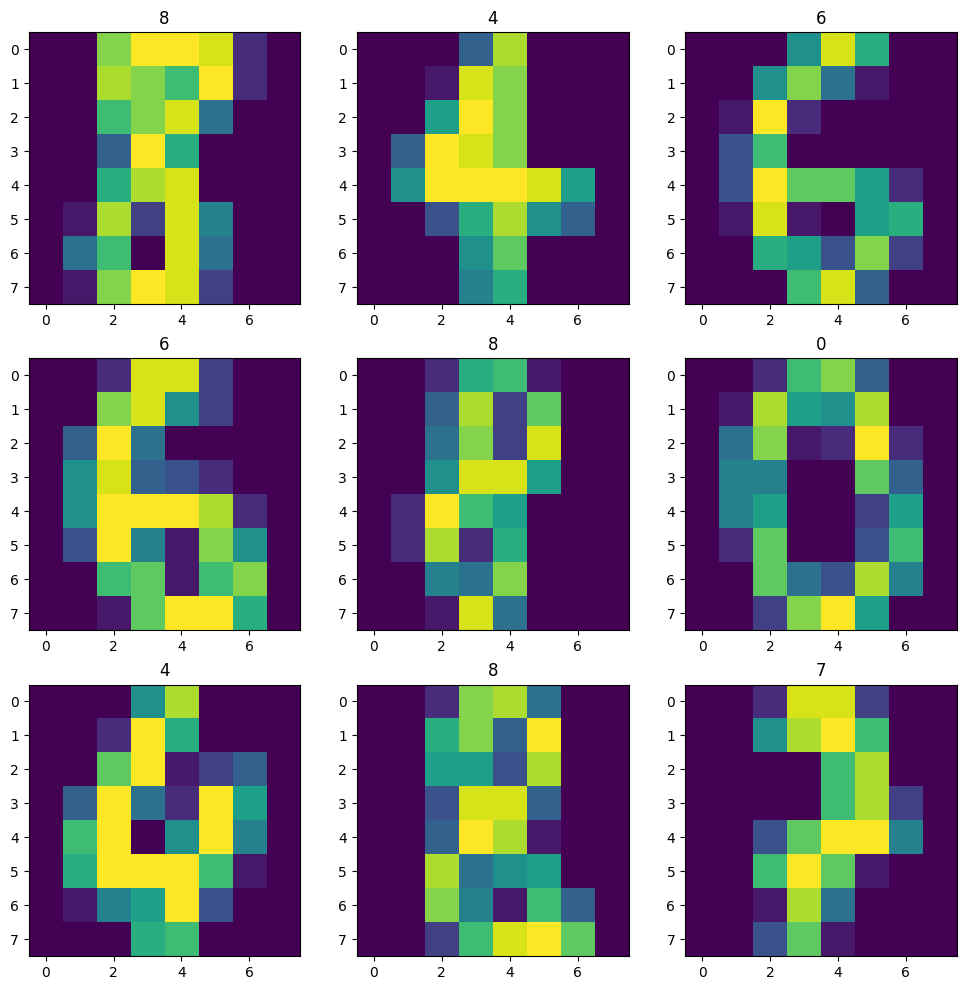

In [9]:
plt.figure(figsize=(12, 12))
idx = np.random.randint(0, 1796, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y[idx[i]])
    img_grid = np.reshape(X.values[idx[i]], (8,8))
    plt.imshow(img_grid)

### Test Train Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Training

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction

In [12]:
y_test_pred = classifier.predict(X_test)

### Measuring Performance

#### Accuracy

In [13]:
# calculate accuracy of class predictions

from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.9511111111111111

#### Confusion Metrics

In [14]:
# print the confusion matrix
con_metrics = metrics.confusion_matrix(y_test, y_test_pred)
con_metrics

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 40,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]], dtype=int64)

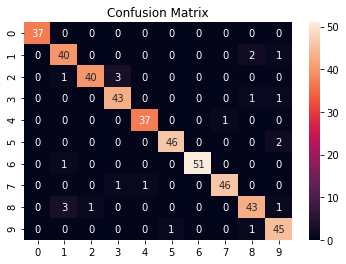

In [15]:
#ploting heatmap for confusion matrix

sns.heatmap(con_metrics, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

#### Classification Report

In [16]:
#Checking Precision, Recall and F1 Score
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



### Decision Tree Model

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_test_pred = dt_classifier.predict(X_test)

metrics.accuracy_score(y_test, y_test_pred)

0.8422222222222222